In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df.shape

(13730, 166)

# Primeiro vamos realizar uma análise exploratória dos dados, para compreender algumas questões.
    - Como estão distribuídas as notas por estado? 
    - As notas de quem fez a prova de língua estrangeira em inglês é maior em relação à quem fez em espanhol? 
    - A escolaridade dos pais do candidato influeciam na nota do candidato?
    - Como estão distribuídas as notas dos candidatos em função da renda mensal familiar? 
    - O sexo do candidato influencia na nota de matemática? 

In [5]:
df_notas_estado = df[['SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]
df_notas_estado.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,10341.000000,10341.000000,10133.000000,10133.000000
mean,473.495155,529.661087,516.472841,482.497928
std,71.093674,73.726344,68.688190,99.826323
min,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,408.900000
50%,459.800000,532.000000,520.900000,461.200000
75%,514.500000,581.200000,564.900000,537.600000
max,806.400000,807.000000,763.600000,952.000000


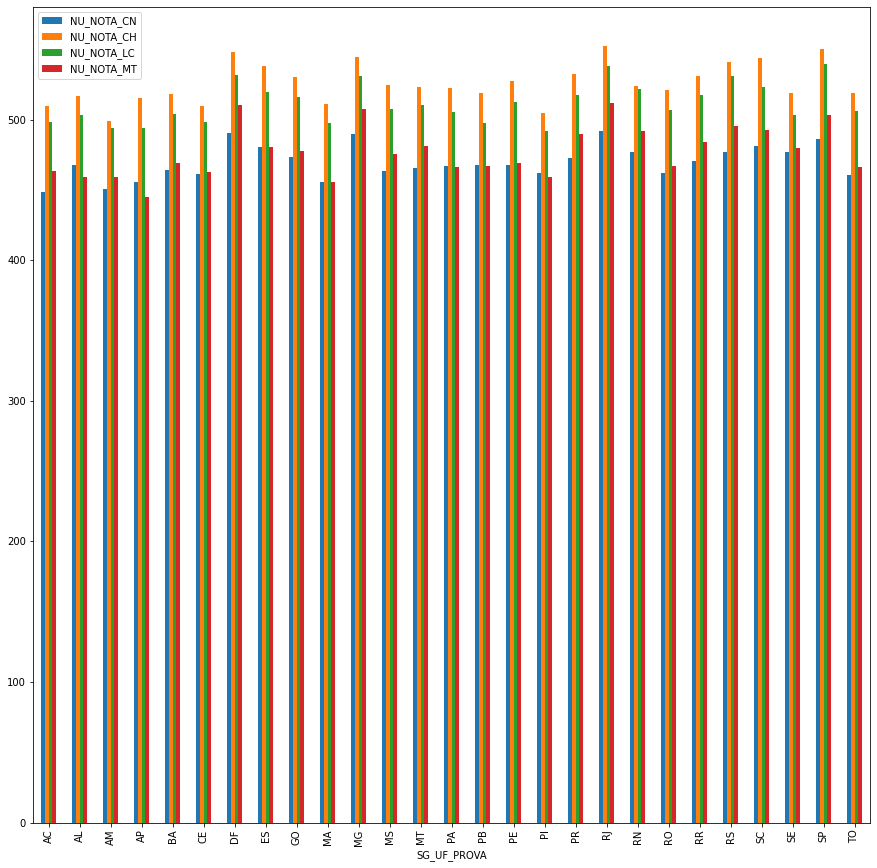

In [6]:
df_notas_estado.groupby('SG_UF_PROVA').mean().plot(kind='bar', figsize=(15, 15))

In [7]:
# Olhando para o gráfico sem levar em conta os valores NaN
df_notas_estado.dropna().describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,10097.000000,10097.000000,10097.000000,10097.000000
mean,473.912509,530.346123,516.665059,482.648638
std,71.098468,73.528309,68.442602,99.685820
min,0.000000,0.000000,0.000000,0.000000
25%,420.100000,481.000000,468.600000,409.000000
50%,460.400000,532.600000,521.100000,461.300000
75%,515.100000,581.900000,564.900000,537.700000
max,806.400000,807.000000,763.600000,952.000000


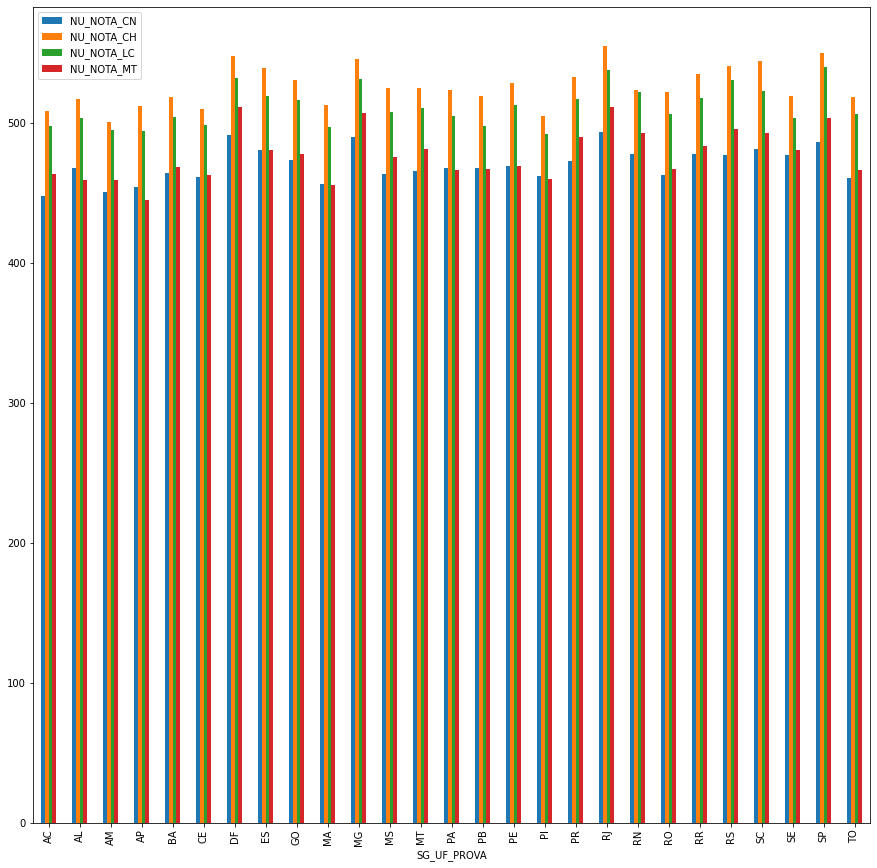

In [8]:
df_notas_estado.dropna().groupby('SG_UF_PROVA').mean().plot(kind='bar', figsize=(15, 15))

Levando em conta as informações como média, desvio padrão e os gráficos acima é plausível assumir que as notas médias por estado não variam entre si. 

In [9]:
df_notas_lingua = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA']].copy()
df_notas_lingua.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA
count,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000
mean,473.495155,529.661087,516.472841,482.497928,0.593664
std,71.093674,73.726344,68.688190,99.826323,0.491167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,408.900000,0.000000
50%,459.800000,532.000000,520.900000,461.200000,1.000000
75%,514.500000,581.200000,564.900000,537.600000,1.000000
max,806.400000,807.000000,763.600000,952.000000,1.000000


In [10]:
df_notas_lingua['TP_LINGUA'] = df_notas_lingua.loc[:, ('TP_LINGUA')].map({0: 'Inglês', 1: 'Espanhol'})

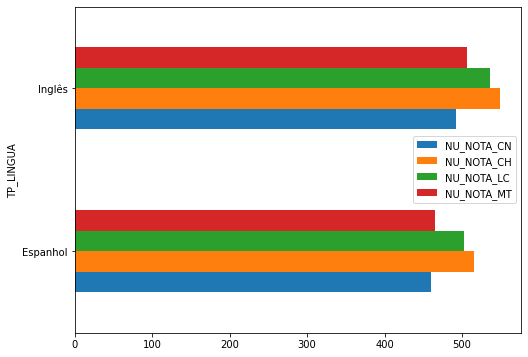

In [11]:
df_notas_lingua.groupby('TP_LINGUA').mean().plot(kind='barh', figsize=(8,6))

In [12]:
# As notas dos candidatos com prova de língua estrangeira em inglês é ligeiramente maior em todas as áreas da prova
(1 - (df_notas_lingua.groupby('TP_LINGUA').mean().iloc[0] / df_notas_lingua.groupby('TP_LINGUA').mean().iloc[1]))

NU_NOTA_CN    0.063860
NU_NOTA_CH    0.059747
NU_NOTA_LC    0.061553
NU_NOTA_MT    0.080587
dtype: float64

Agora vamos verificar as notas pela renda familiar

In [13]:
df_notas_renda = df[['Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
df_notas_renda

,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,C,436.3,495.4,581.2,399.4,520.0
2,B,474.5,544.1,599.0,459.8,580.0
3,C,NaN,NaN,NaN,NaN,NaN
4,E,NaN,NaN,NaN,NaN,NaN
5,C,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4582,G,438.2,419.7,394.5,403.2,440.0
4583,C,423.8,557.9,533.0,452.4,560.0
4584,B,460.5,528.9,569.3,398.0,600.0
4585,G,422.5,621.7,569.0,386.6,460.0


In [14]:
df_notas_renda.loc[:, ('Q006')].value_counts()

B    4264
C    3641
D    1636
E    1028
F     667
G     642
A     491
H     433
I     253
J     165
N      97
K      93
P      68
Q      66
O      66
L      65
M      55
Name: Q006, dtype: int64

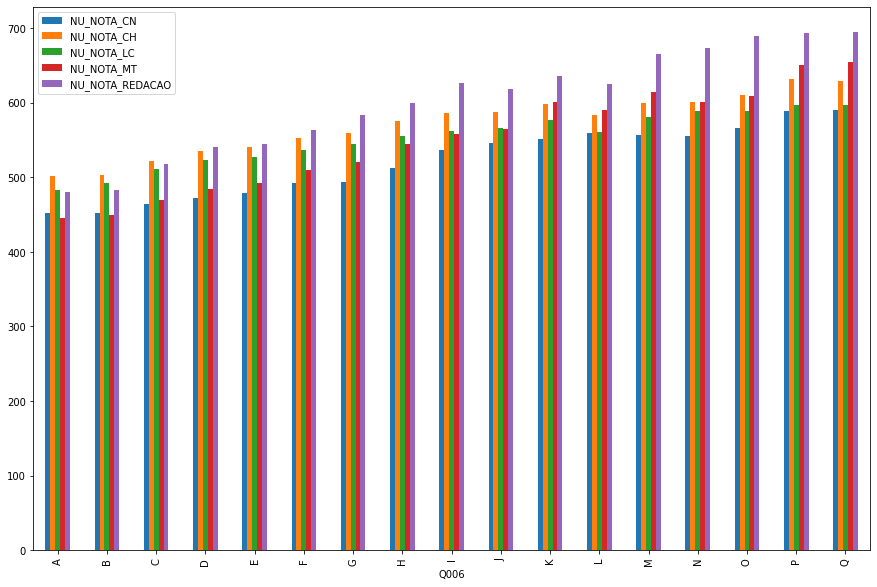

In [15]:
df_notas_renda.groupby('Q006').mean().plot(kind='bar', figsize=(15, 10))

A partir do gráfico é possível verificar que as médias das notas mudam em função da renda familiar. 

Pelo post abaixo podemos medir a correlação usando três formas diferentes, sendo elas: Point Biseral Correlation, Regressão Logística e Kruskal-Wallis H Test (Or parametric forms such as t-test or ANOVA).

ref: https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
# Realizando o label enconder em Q006
df_notas_renda.loc[:, ('Q006')] = le.fit_transform(df_notas_renda['Q006'])
df_notas_renda

/home/guilherme/anaconda3/envs/aceleradev-ds/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,2,436.3,495.4,581.2,399.4,520.0
2,1,474.5,544.1,599.0,459.8,580.0
3,2,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN
5,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4582,6,438.2,419.7,394.5,403.2,440.0
4583,2,423.8,557.9,533.0,452.4,560.0
4584,1,460.5,528.9,569.3,398.0,600.0
4585,6,422.5,621.7,569.0,386.6,460.0


Agora vamos tratar os valores nulos das features de notas. 

In [18]:
# Primeiro vamos verificar quem foi eliminado ou faltou e então atribuir o valor zero, o que faz sentido para o contexto do problema. 

df_notas_presenca = df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

In [19]:
# Para os eliminados, i.e., tp_presença = 2 temos:
df_notas_presenca.loc[:, ('NU_NOTA_CN')] = np.where(df_notas_presenca.loc[:, ('TP_PRESENCA_CN')] == 2, 0, df_notas_presenca['NU_NOTA_CN'])
df_notas_presenca.loc[:, ('NU_NOTA_CH')] = np.where(df_notas_presenca.loc[:, ('TP_PRESENCA_CH')] == 2, 0, df_notas_presenca['NU_NOTA_CH'])
df_notas_presenca.loc[:, ('NU_NOTA_LC')] = np.where(df_notas_presenca.loc[:, ('TP_PRESENCA_LC')] == 2, 0, df_notas_presenca['NU_NOTA_LC'])
df_notas_presenca.loc[:, ('NU_NOTA_MT')] = np.where(df_notas_presenca.loc[:, ('TP_PRESENCA_MT')] == 2, 0, df_notas_presenca['NU_NOTA_MT'])
df_notas_presenca.loc[:, ('NU_NOTA_REDACAO')] = np.where(df_notas_presenca.loc[:, ('TP_PRESENCA_MT')] == 2, 0, df_notas_presenca['NU_NOTA_REDACAO'])

/home/guilherme/anaconda3/envs/aceleradev-ds/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
df_notas_presenca[df_notas_presenca['TP_PRESENCA_MT'] == 2]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
546,1,1,2,2,565.5,533.4,0.0,0.0,0.0
1305,1,1,2,2,488.9,548.9,0.0,0.0,0.0
2080,1,1,2,2,425.4,578.3,0.0,0.0,0.0
2744,1,1,2,2,518.8,510.9,0.0,0.0,0.0
3114,1,1,2,2,576.7,659.7,0.0,0.0,0.0


In [21]:
# Olhando para os que faltaram, i.e., TP_PRESENÇA = 0
df_notas_presenca[df_notas_presenca['TP_PRESENCA_MT'] == 0].isnull().sum()

TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
TP_PRESENCA_MT        0
NU_NOTA_CN         3348
NU_NOTA_CH         3348
NU_NOTA_LC         3592
NU_NOTA_MT         3592
NU_NOTA_REDACAO    3592
dtype: int64

Olhando para os valores NaNs, verificamos que eles estão atrelados aos candidatos que faltaram à prova ou foram eliminados, portanto basta preencher por 0.

Após o treinamento do modelo, verificou-se que o desempenho não foi satisfatório, a taxa de acurácia ficou em 90%, vamos dropar os valores nulos dos que faltaram comparar o desempenho do modelo seguindo esta proposta. Além disso, me baseando na análise exploratória acima, a variável Q006 será feature do modelo.

In [22]:
df_predict = df[['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
                 'TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047']]

In [23]:
df_predict.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO,TP_ESCOLA,TP_COR_RACA,Q001,Q002,Q006,Q047
1,24,436.3,495.4,581.2,399.4,520.0,M,1,1,D,D,C,A
2,17,474.5,544.1,599.0,459.8,580.0,F,2,3,A,A,B,A
3,21,NaN,NaN,NaN,NaN,NaN,F,1,3,D,D,C,A
4,25,NaN,NaN,NaN,NaN,NaN,F,1,0,H,E,E,D
5,28,NaN,NaN,NaN,NaN,NaN,M,1,2,E,D,C,A


In [24]:
df_predict.fillna(0, inplace=True)

/home/guilherme/anaconda3/envs/aceleradev-ds/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


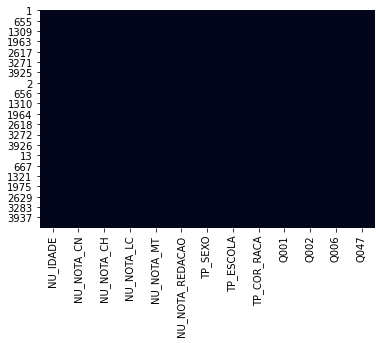

In [25]:
# Verificando a presença de nulos graficamente
sns.heatmap(df_predict.isnull(), cbar=False)

In [26]:
df_sexo = df['TP_SEXO'].map({'M': 0, 'F': 1})

In [27]:
# Vamos verificar a correlação entre o sexo do candidato e as notas de matemática
stats.ttest_ind(df_predict['NU_NOTA_MT'], df_sexo)

Ttest_indResult(statistic=182.01301970806625, pvalue=0.0)

Assumindo como hipótese nula, H0, candidatos do sexo masculino e feminino tem a mesma média em matemática.
Como o p-value ficou abaixo do valor de significância estatística, 0.05, rejeitamos a hipótese nula. Portanto as médias de cada sexo variam.

ref: 
https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [28]:
# # Padronizando as notas
# for col in df_predict.columns:
#     if 'NU_NOTA' in col:
#             scaler = preprocessing.StandardScaler().fit(df_predict[[col]])
#             df_predict[col] = scaler.transform(df_predict[[col]])

In [29]:
df_predict.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO,TP_ESCOLA,TP_COR_RACA,Q001,Q002,Q006,Q047
1,24,436.3,495.4,581.2,399.4,520.0,M,1,1,D,D,C,A
2,17,474.5,544.1,599.0,459.8,580.0,F,2,3,A,A,B,A
3,21,0.0,0.0,0.0,0.0,0.0,F,1,3,D,D,C,A
4,25,0.0,0.0,0.0,0.0,0.0,F,1,0,H,E,E,D
5,28,0.0,0.0,0.0,0.0,0.0,M,1,2,E,D,C,A


In [30]:
# Fazendo o one-hot-enconding da features categoricas
df_predict = pd.get_dummies(df_predict, 
                            columns=['TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047'], 
                            prefix=['TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047'])

In [31]:
df_predict.shape

(13730, 56)

Agora vamos fazer a predição usando a regressão logística

In [32]:
df_predict.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO_F,TP_SEXO_M,TP_ESCOLA_1,TP_ESCOLA_2,...,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,24,436.3,495.4,581.2,399.4,520.0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,17,474.5,544.1,599.0,459.8,580.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,21,0.0,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,25,0.0,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,28,0.0,0.0,0.0,0.0,0.0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Separando as variaveis dependente e independente
y = df_predict['NU_NOTA_MT']
df_predict.drop(['NU_NOTA_MT'], axis=1, inplace=True)
X = df_predict

In [34]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
# Visualizando shape da divisão
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10297, 55) (3433, 55) (10297,) (3433,)


In [36]:
# Instanciando o modelo e treinando
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
# Fazendo a predição e medindo o score
linear_reg.predict(X_test)
accuracy = linear_reg.score(X_test,y_test)
print(accuracy * 100, '%')

91.15364430597845 %


In [38]:
# Importando os dados de teste para submeter o desafio
df_test = pd.read_csv('test.csv')

In [39]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [40]:
features = ['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                 'TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047']
df_test[features].head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,TP_ESCOLA,TP_COR_RACA,Q001,Q002,Q006,Q047
0,22,464.8,443.5,431.8,420.0,F,1,3,B,A,C,A
1,26,391.1,491.1,548.0,580.0,F,1,3,E,B,C,A
2,21,595.9,622.7,613.6,320.0,M,2,1,E,E,D,A
3,27,NaN,NaN,NaN,NaN,F,1,3,H,E,G,A
4,18,592.9,492.6,571.4,320.0,M,2,1,D,H,H,A


In [41]:
# Fazendo o one-hot-enconding da features categoricas
df_answer = pd.get_dummies(df_test[features], 
                            columns=['TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047'], 
                            prefix=['TP_SEXO','TP_ESCOLA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q006','Q047'])

In [42]:
# Preenchendo os valores nulos e adicionando a coluna TP_ESCOLA_4, esta coluna não existe nos dados de test
df_answer.fillna(0, inplace=True)
df_answer['TP_ESCOLA_4'] = np.array(0)

In [43]:
df_test['NU_NOTA_MT'] = linear_reg.predict(df_answer)

In [44]:
resposta_final = df_test[['NU_INSCRICAO', 'NU_NOTA_MT']]

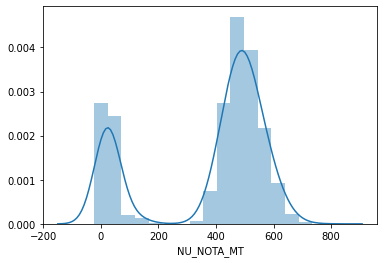

In [45]:
sns.distplot(resposta_final['NU_NOTA_MT'])

In [46]:
resposta_final.to_csv(r'/home/guilherme/codenation/enem-2/answer.csv', index=False)